# Predict the fare amount of future rides using regression analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Ritikyadav\OneDrive\Documents\Desktop\MentorMind_upGrad\Dataset_Predict The Fare Amount Of Future Rides Using Regression Analysis\uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Explore dataset

In [4]:
print(df.shape)

(200000, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
# drop the key columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

#### Handle the missing data

In [9]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
# drop rows with missing values
df = df.dropna()

In [11]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


#### check target variable

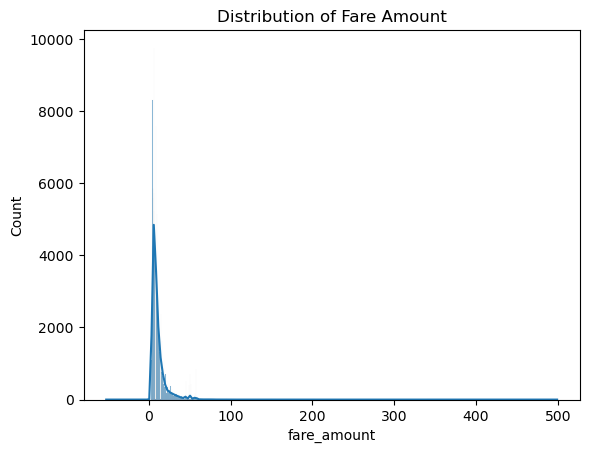

In [12]:
sns.histplot(df["fare_amount"],kde = True)
plt.title("Distribution of Fare Amount")
plt.show()

##### Box plot to check the outliers

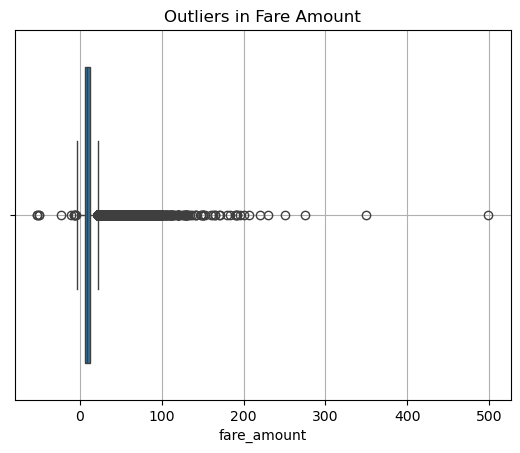

In [13]:
sns.boxplot(x = df["fare_amount"])
plt.title("Outliers in Fare Amount")
plt.grid()
plt.show()

## Featues Engineering

In [14]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour
df["day"] = df["pickup_datetime"].dt.day
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["month"] = df["pickup_datetime"].dt.month

In [15]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'day_of_week', 'month'],
      dtype='object')

### Calculate the distance using haversine formula 

In [16]:
from math import radians, sin,cos,sqrt,atan2


In [21]:
def haversine(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) **2
    return 2 * R * atan2(sqrt(a),sqrt(1-a))
    
df["distance_km"] = df.apply(lambda row: haversine(row["pickup_latitude"],
                                                  row["pickup_longitude"],
                                                  row["dropoff_latitude"],
                                                  row["dropoff_longitude"]),axis = 1 )
    

In [22]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'day_of_week', 'month',
       'distance_km'],
      dtype='object')

In [23]:
# Categorize Distance
df["distance_category"] = pd.cut(df["distance_km"],bins = [0,2,6,20],labels = ["short","median","long"])
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,day_of_week,month,distance_km,distance_category
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,5,1.683323,short
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,7,2.457590,median
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,8,5.036377,median
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,6,1.661683,short
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,8,4.475450,median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,6,10,0.112210,short
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,4,3,1.875050,short
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,0,6,12.850319,long
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,2,5,3.539715,median


### Split the Dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# select features(X) and target(y)
X = df[["distance_km","hour","day_of_week","month","passenger_count"]]
y = df["fare_amount"]


In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [28]:
print(X_train.shape,X_test.shape)

(159999, 5) (40000, 5)


### Data Scaling/ Normalization

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
print(X_train_scaled,X_test_scaled)

[[-0.04916947  1.3071289  -1.05273594  0.79152662 -0.48742328]
 [-0.04952449  1.15370658 -1.5663893  -0.37118009 -0.48742328]
 [-0.05087977 -0.53393888  1.00187752 -0.95253344  0.93623406]
 ...
 [-0.0445871  -1.45447277  0.48822415  1.37287998 -0.48742328]
 [-0.0508082  -0.6873612  -0.53908257  0.50084995 -0.48742328]
 [-0.01811843  1.15370658 -1.05273594  1.0822033  -0.48742328]] [[-0.04877897 -1.91473972 -0.53908257 -1.24321012 -0.48742328]
 [-0.0517564   0.23317269  1.51553088 -0.08050341 -0.48742328]
 [-0.04543278  0.54001732  1.00187752 -1.53388679  2.3598914 ]
 ...
 [-0.05180635 -0.07367194 -1.5663893   0.21017327 -0.48742328]
 [-0.04552451  0.69343964 -0.53908257  0.50084995  0.93623406]
 [-0.05030321 -0.84078351 -1.5663893  -0.08050341 -0.48742328]]


## Correlation Analysis

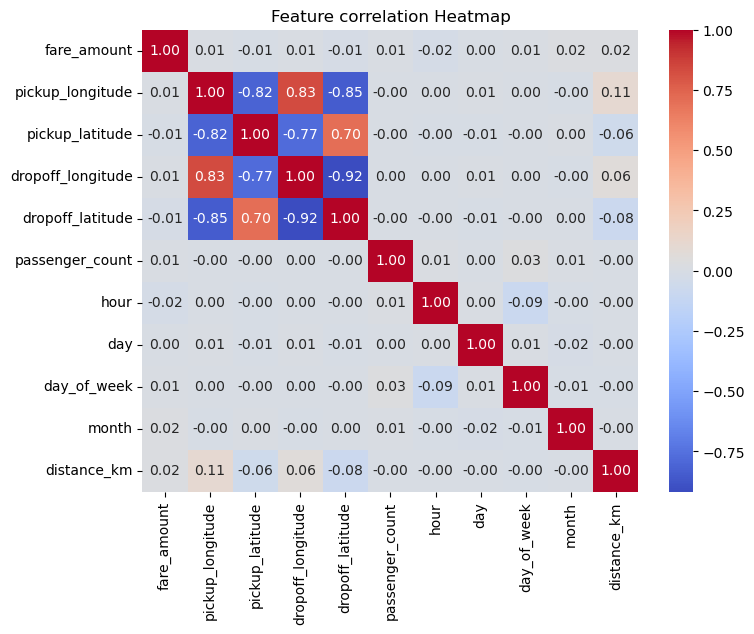

In [32]:
numeric_df = df.select_dtypes(include = ["number"])
corr_matrix = numeric_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm",fmt = ".2f")
plt.title("Feature correlation Heatmap")
plt.show()

### Component 3 : Regression Modeling

To select and train appropriate regression models (Linear Regression, Decision Tree, Random Forest, etc.) using the cleaned and scaled Uber dataset to predict fare amount.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

### Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [35]:
y_pred_lr

array([11.36744377, 11.29147207, 11.14101472, ..., 11.28816793,
       11.38495535, 11.37704143])

## Decision Tree Regression

In [37]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [38]:
y_pred_dt

array([12. ,  5.7,  8.9, ...,  8.9, 23. , 12.5])

## Random Forest Regression

In [43]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [44]:
y_pred_rf

array([ 7.805 ,  5.136 , 10.901 , ...,  6.186 , 13.483 ,  7.7389])

### Support Vector Regression

In [ ]:
svr = SVR(kernel="rbf")
svr.fit(X_train_scaled,y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [ ]:
y_pred_svr